Introducción a "R": Sesión Cero / Parte 1
===

Sesión 1
===

In [1]:
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.5
✔ ggplot2   3.5.1     ✔ stringr   1.5.1
✔ lubridate 1.9.3     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [3]:
library(readxl)

La necesidad de variables para analizar información
===

El análisis de datos tiene por objetivo obtener información que nos permita tomar decisiones. En este proceso que usamos variables para ir almacenando datos y/o resultados.

Una variable puede almacenar diferentes tipos de valores tales como números, caractéres, etc. Estos diferentes tipos de valores son llamados "data types" en el código del lenguaje de programación.

Por ejemplo:

In [4]:
# almacena el valor 123 en la variable llamada "x"
x <- 123L

# imprime el valor de la variable x
print(x)

# imprime el tipo de dato de "x"
print(class(x))

[1] 123
[1] "integer"


Tipos de Datos en "R"
===

En "R" se trabaja con seis (6) tipos de datos (data types):

* integer
* numeric
* character
* logic
* complex
* raw

Tipo "Integer" y "Numeric"
==

El tipo de dato "integer" es usado cuando necesitamos procesar información numérica de valores que sabemos que son enteros (sin decimales).

¿Por qué no usamos sólo numeros reales (con decimales) si el conjunto de números reales contiene al conjunto de números enteros?

Los números enteros son de mucha utilidad porque son más fáciles de operar computacionalmente, y además requiere menos memoria computacional para su almacenamiento.

Para indicar a "R" que trate a un número como entero es ponerle la terminación "L" al número. Como vimos en el ejemplo anterior.

In [5]:
y <- 42L

In [6]:
print(class(y))

[1] "integer"


In [7]:
z <- 42

In [8]:
print(class(z))

[1] "numeric"


Si no indicamos a "R" que un dato numérico es entero, por defecto tratará el dato como si fuera del tipo "numeric".

El tipo de dato "numeric" corresponde a los números reales, vale decir, los números con decimales.

In [9]:
# almacenemos en la variable "x1" a la tercera parte del valor unidad (uno)
x1 <- 1/3

# imprime el valor de "x1"
print(x1)

# imprime el tipo de dato de "x1"
print(class(x1))

[1] 0.3333333
[1] "numeric"


Tipo "Character"
===

Es muy frecuente que los datos de donde requerimos extraer información sean compuestos no sólo por valores numéricos sino también por textos que identifica por ejemplo el nombre de una región ("Loreto") o el apellido de una persona ("Orosco").

En estos casos nos apoyamos con el tipo de dato "character" para almacena una cadena de caractéres.

In [10]:
# almacenemos en la variable "y1" a la cadena de caractéres "Loreto"
y1 <- "Loreto"

# Imprimir "y1"
print(y1)

# Imprimir el tipo de dato de "y1"
print(class(y1))

[1] "Loreto"
[1] "character"


In [11]:
y2 <- substr(y1,1,2) # extraemos desde la posición inicial 1 a la posición final 2.
print(y2)

[1] "Lo"


In [12]:
largo <- nchar(y1) # determinamos el número de caractéres de "y1"
largo

[1] 6

In [13]:
y3 <- substr(y1,3,largo) # extraemos desde la posición 3 hasta la posición final ("largo")
y3

[1] "reto"

Tipo "Logic"
==

Para darle instrucciones a "R" en el procesamiento de los datos resulta necesario usar operadores lógicos dentro de sentencias lógicas (argumentos lógicos) que requieren ser validados como verdaderos o falsos. Para este tipo de tareas usamos el tipo de dato "logic".

In [14]:
x2 <- 32L

In [15]:
y4 <- "Agosto"

In [16]:
if (class(x2) == "integer") {
    print("el tipo de dato de x2 es: integer")
    } else {
    print("el tipo de dato de x2 NO es entero")
    }

[1] "el tipo de dato de x2 es: integer"


In [17]:
if (class(y4) == "integer") {
    print("el tipo de dato de y4 es: integer")
    } else {
    print("el tipo de dato de y4 NO es entero")
    }

[1] "el tipo de dato de y4 NO es entero"


In [18]:
if (y4 == "Agosto") {
    Estiaje <- TRUE }

if (x2 < 50 & Estiaje == TRUE) { # Si "x2 < 50" es verdadero y "es estiaje" ... 
    monto <- 130
    } else {
    monto <- 10
    }

print(monto)

[1] 130


Leyendo datos desde archivos externos (CSV, XLS)
==

Data Frame y Vectores
====

Habitualmente los datos que requerimos procesar se encuentran en archivos de datos que fueron organizados para fines diversos. Los tipos de archivos de datos más comunes son archivos de texto (ASCII) sea formateados en CSV (Comma Separated Values), TSV (Tab Separated Values) o también en archivos Excel.

"R" en su versión base (sin ningún paquete adicional) tiene funciones que realizan el trabajo de leer archivos texto y trasladar su contenido hacia estructuras de datos convenientes para que luego puedan ser procesados.

La estructura de datos usada con más frecuencia es el "data frame" que es una tabla de datos organizadas en filas y columnas. Cada columna es definida con un nombre y un tipo de dato, y cada fila representa un valor almacenado en dicha columna.

Tomaremos como ejemplo un archivo que contiene las observaciones mensuales de las tasas de interés en USA desde 1946-12 hasta 1991-02. Los valores están expresados en tasa de interés anual y cada columna representa:

r1 : tasa de interés para bonos a plazo de 1 mes (% anual)

r2 : tasa de interés para bonos a plazo de 2 meses (% anual)

r3 : tasa de interés para bonos a plazo de 3 meses (% anual)

r5 : tasa de interés para bonos a plazo de 5 meses (% anual)

...

r120 : tasa de interés para bonos a plazo de 120 meses (% anual)

In [19]:
df_rates <- read.csv("Irates.csv")

In [20]:
head(df_rates) # muestra las seis (6) primeras filas de la estructura de datos

,Date,r1,r2,r3,r5,r6,r11,r12,r36,r60,r120
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Dec 1946,0.325,0.422,0.477,0.549,0.577,0.698,0.720,1.145,1.415,1.825
2,Jan 1947,0.322,0.427,0.485,0.555,0.583,0.698,0.718,1.119,1.386,1.824
3,Feb 1947,0.326,0.419,0.473,0.543,0.571,0.693,0.715,1.140,1.406,1.817
4,Mar 1947,0.318,0.441,0.508,0.583,0.610,0.718,0.737,1.105,1.364,1.804
5,Apr 1947,0.302,0.445,0.521,0.606,0.637,0.759,0.780,1.172,1.416,1.815
6,May 1947,0.288,0.473,0.570,0.666,0.698,0.811,0.830,1.169,1.399,1.805


In [21]:
str(df_rates) # muestra la información de la estructura de datos de la tabla

'data.frame':	531 obs. of  11 variables:
 $ Date: chr  "Dec 1946" "Jan 1947" "Feb 1947" "Mar 1947" ...
 $ r1  : num  0.325 0.322 0.326 0.318 0.302 0.288 0.328 0.378 0.528 0.742 ...
 $ r2  : num  0.422 0.427 0.419 0.441 0.445 0.473 0.486 0.576 0.755 0.882 ...
 $ r3  : num  0.477 0.485 0.473 0.508 0.521 0.57 0.566 0.673 0.863 0.949 ...
 $ r5  : num  0.549 0.555 0.543 0.583 0.606 ...
 $ r6  : num  0.577 0.583 0.571 0.61 0.637 ...
 $ r11 : num  0.698 0.698 0.693 0.718 0.759 ...
 $ r12 : num  0.72 0.718 0.715 0.737 0.78 ...
 $ r36 : num  1.15 1.12 1.14 1.1 1.17 ...
 $ r60 : num  1.42 1.39 1.41 1.36 1.42 ...
 $ r120: num  1.82 1.82 1.82 1.8 1.81 ...


In [22]:
df_rates[3,2] # selecciono el elemento de la fila 3 y columna 2

[1] 0.326

In [23]:
df_rates[3,'r1'] # selecciono el elemento de la fila 3 y la columna con nombre 'r1'

[1] 0.326

In [24]:
class(df_rates[3,'r1'])

[1] "numeric"

In [25]:
df_rates[3,c('r1','r3')] # selecciono el elemento de la fila 3 y las columnas con nombres 'r1' y 'r3'

,r1,r3
,<dbl>,<dbl>
3,0.326,0.473


Note que en este último ejemplo hemos usado una estructura de datos especial conocida como vector, la cual hemos construido usando la expresión "c('r1', 'r3')".

In [26]:
c('r1', 'r3') # crea un vector que contiene dos valores de texto "r1" y "r3" 

[1] "r1" "r3"

Un vector es como una lista de datos. Es común utilizar vectores cuando queremos que una función se aplique sobre una lista de casos. Por ejemplo, imaginemos que queremos dibujar tres circulos de tres colores uno a continuación de otro, podemos usar una función que de manera genérica dibuja un circulo, indicando como datos el "radio" y el "color". Entonces en lugar de llamar a esa función tres veces, podría usar un vector para el parámetro "color" de la función. 

In [27]:
# creamos un vector con tres valores de texto "rojo", "azul" y "amarillo"
color_a_dibujar <- c('rojo', 'azul', 'amarillo')

# imaginemos la función "dibuja_circulo(radio, color)"
# podría usar esta función del siguiente modo: dibuja_circulo(radio, color_a_dibujar)
# para dibujar tres circulos del mismo radio pero diferente color con una sola llamada a la función.


Volvamos a los datos de las tasas de interés que hemos leído de un archivo externo y que ahora tenemos almacenado en el data frame llamado "df_rates".

Digamos que queremos analizar el comportamiento de la tasa de interés de corto plazo, que representa el costo del dinero para operaciones de deuda interbancaria y para operaciones bursátiles de corto plazo. Para el análisis digamos que escogemos analizar la tasa a plazo de 1 mes ("r1").

Vamos a extraer los datos de la columna "r1" y almacenarlos en una variable que llamaremos "tasa_corto_plazo". Una forma de hacer esto es usar la misma notación que usamos para extraer un elemento "[fila, columna]" pero dejando en blanco la posición de la fila. Al deja en blanco esa posición de fila, "R" interpretará que deseamos EXTRAER TODAS LAS FILAS correspondientes a determinada(s) columna(s).

In [28]:
tasa_corto_plazo <- df_rates[ ,'r1']

head(tasa_corto_plazo) # muestra seis primeros elementos de "tasa_corto_plazo"
tail(tasa_corto_plazo) # muestra seis últimos elementos de "tasa_corto_plazo"
print("tamaño de 'tasa_corto_plazo' =")
length(tasa_corto_plazo)

[1] 0.325 0.322 0.326 0.318 0.302 0.288

[1] 6.959 6.709 6.659 5.867 5.953 5.677

[1] "tamaño de 'tasa_corto_plazo' ="


[1] 531

Nótese que el resultado de la operación anterior ha sido entregado por "R" organizado en la forma de un vector, es decir una lista de valores, ya que de manera automática identificó que solicitábamos apenas una columna de datos.

Debemos notar también que al haber solicitado la información de esa manera estamos perdiendo información importante de la fecha (mes y año) a la que pertenece cada valor.

Intentemos entonces extraer los valores de la fecha (mes y año) y la tasa de interés.

In [29]:
tasa_corto_plazo <- df_rates[ ,c('Date','r1')]

head(tasa_corto_plazo) # muestra seis primeros elementos de "tasa_corto_plazo"
tail(tasa_corto_plazo) # muestra seis últimos elementos de "tasa_corto_plazo"

,Date,r1
,<chr>,<dbl>
1,Dec 1946,0.325
2,Jan 1947,0.322
3,Feb 1947,0.326
4,Mar 1947,0.318
5,Apr 1947,0.302
6,May 1947,0.288


,Date,r1
,<chr>,<dbl>
526,Sep 1990,6.959
527,Oct 1990,6.709
528,Nov 1990,6.659
529,Dec 1990,5.867
530,Jan 1991,5.953
531,Feb 1991,5.677


Al pedir a "R" que extraiga dos columnas, de manera automática entrega el resultado organizado en formato "data frame", 531 filas y dos columnas solicitadas.

Procesamiento de Datos
===

Otra manera de referirnos a una columna de una tabla de datos (data frame) es usando el operador "$".

Colocamos el nombre de la tabla seguido del operador "$" y adicionamos el nombre de la columna.

In [30]:
tasa_corto_plazo$r1 # entrega un vector con los valores de la columna "r1"

[1]  0.325  0.322  0.326  0.318  0.302  0.288  0.328  0.378  0.528  0.742
 [11]  0.732  0.814  0.904  0.959  0.968  0.978  0.984  0.987  0.975  0.992
 [21]  1.063  1.082  1.084  1.101  1.110  1.126  1.139  1.114  1.123  1.092
 [31]  1.016  0.960  0.982  1.010  0.985  1.011  1.035  1.072  1.100  1.084
 [41]  1.112  1.136  1.129  1.158  1.246  1.291  1.184  1.307  1.250  1.209
 [51]  1.210  1.439  1.329  1.344  1.382  1.491  1.538  1.596  1.258  1.388
 [61]  1.696  1.332  1.342  1.374  1.579  1.642  1.747  1.802  1.712  1.459
 [71]  1.589  1.781  1.941  1.819  2.019  1.987  2.062  1.935  1.606  1.936
 [81]  1.790  1.220  0.975  1.439  1.248  0.958  0.887  0.985  0.673  0.603
 [91]  0.620  0.679  1.107  0.903  0.845  0.929  0.949  1.097  1.139  1.328
[101]  1.496  1.152  1.271  1.667  1.948  2.145  2.052  2.111  2.424  2.278
[111]  1.969  2.198  2.628  2.374  2.333  2.082  2.396  2.700  2.560  2.806
[121]  3.077  3.064  2.938  2.886  3.021  3.210  3.083  3.056  3.072  3.228
[131]  3.361  2.635  2.728  1.456  1.137  0.990  1.155  0.249  0.747  0.704
[141]  1.872  1.949  1.822  1.904  2.419  2.467  2.379  2.567  2.739  2.747
[151]  2.774  2.399  3.477  3.638  3.169  3.531  4.079  3.538  3.807  2.683
[161]  2.970  2.596  1.655  1.831  1.972  2.340  1.606  1.789  2.026  2.039
[171]  2.482  2.192  1.933  2.239  2.078  1.744  2.047  1.992  1.957  2.278
[181]  2.483  2.485  2.485  2.632  2.694  2.455  2.928  2.685  2.661  2.686
[191]  2.533  2.671  2.941  2.928  2.842  2.204  2.853  2.950  2.975  3.053
[201]  3.264  3.437  3.364  3.274  3.511  3.424  3.528  3.513  3.320  3.289
[211]  3.456  3.317  3.398  3.526  3.451  3.631  3.561  3.854  3.866  3.822
[221]  3.885  3.863  3.787  3.812  3.807  3.949  3.917  3.925  4.440  4.521
[231]  4.497  4.403  4.631  4.495  4.495  4.576  4.792  5.198  4.848  4.624
[241]  4.699  4.537  4.372  4.014  3.543  3.345  3.748  3.788  3.928  4.248
[251]  4.185  4.275  4.426  4.739  4.788  4.941  5.335  5.568  5.289  5.102
[261]  5.049  5.197  5.336  5.071  6.138  5.948  5.892  5.638  6.111  5.971
[271]  6.256  6.547  7.047  7.031  6.694  6.892  7.280  7.622  6.683  6.425
[281]  6.523  6.564  6.119  5.920  6.238  5.557  5.455  4.754  4.572  4.113
[291]  3.250  3.462  3.807  4.203  4.950  5.206  4.456  4.473  4.057  4.064
[301]  3.330  3.024  3.250  3.420  3.285  3.503  3.675  3.555  4.346  4.482
[311]  4.540  4.793  4.927  5.437  5.592  6.083  6.013  6.531  7.454  8.289
[321]  8.636  7.126  7.147  7.488  7.292  7.518  7.578  8.513  8.727  7.664
[331]  7.655  7.553  9.205  6.056  7.117  7.452  6.770  5.533  4.977  5.266
[341]  5.149  4.940  5.667  6.003  5.980  6.310  5.360  5.125  5.056  4.525
[351]  4.672  4.778  4.696  5.244  5.296  5.102  4.978  5.068  4.745  4.412
[361]  4.263  4.566  4.523  4.507  4.442  4.901  4.956  5.248  5.381  5.743
[371]  6.111  5.672  5.822  6.070  6.226  6.564  6.026  6.442  6.606  6.554
[381]  7.875  7.997  8.655  8.989  8.628  9.507  9.627  9.589  9.584  9.778
[391]  8.977  9.136 10.107 10.218 11.728 11.230 10.274 11.871 13.919 15.071
[401] 10.389  7.847  6.665  7.835  9.200 11.204 11.657 14.394 12.901 14.717
[411] 14.197 13.034 14.114 16.210 14.413 14.980 15.639 13.679 12.972 10.237
[421]  9.710 12.141 11.980 13.963 12.316 11.616 11.742  9.147  7.513  6.937
[431]  7.722  7.873  8.071  8.066  7.909  8.558  8.099  8.559  8.568  8.955
[441]  9.008  8.775  8.491  8.576  8.633  8.940  8.863  9.504  9.488  9.558
[451]  9.386 10.029 10.743 10.442  8.570  8.000  7.229  7.725  7.671  8.037
[461]  7.516  6.996  6.719  7.056  7.243  7.109  7.165  6.592  6.237  6.805
[471]  6.887  6.579  5.981  6.234  6.006  5.499  4.859  5.202  5.033  5.241
[481]  4.998  5.510  5.489  5.201  4.984  5.597  5.397  5.546  5.805  6.484
[491]  4.364  3.800  3.880  4.930  5.267  5.730  5.768  6.083  6.128  6.524
[501]  7.544  7.073  6.957  7.084  7.196  8.066  8.075  9.043  8.630  8.519
[511]  8.254  7.934  7.501  7.588  7.842  7.938  6.651  7.627  7.740  8.083
[521]  7.666  7.652  7.613  7.596  7.537  6.959  6

In [31]:
mean(tasa_corto_plazo$r1)

[1] 4.820158

In [32]:
median(tasa_corto_plazo$r1)

[1] 4.482

In [33]:
summary(tasa_corto_plazo$r1) # muestra principales indicadores de la distribución de los datos

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.249   2.128   4.482   4.820   6.846  16.210 

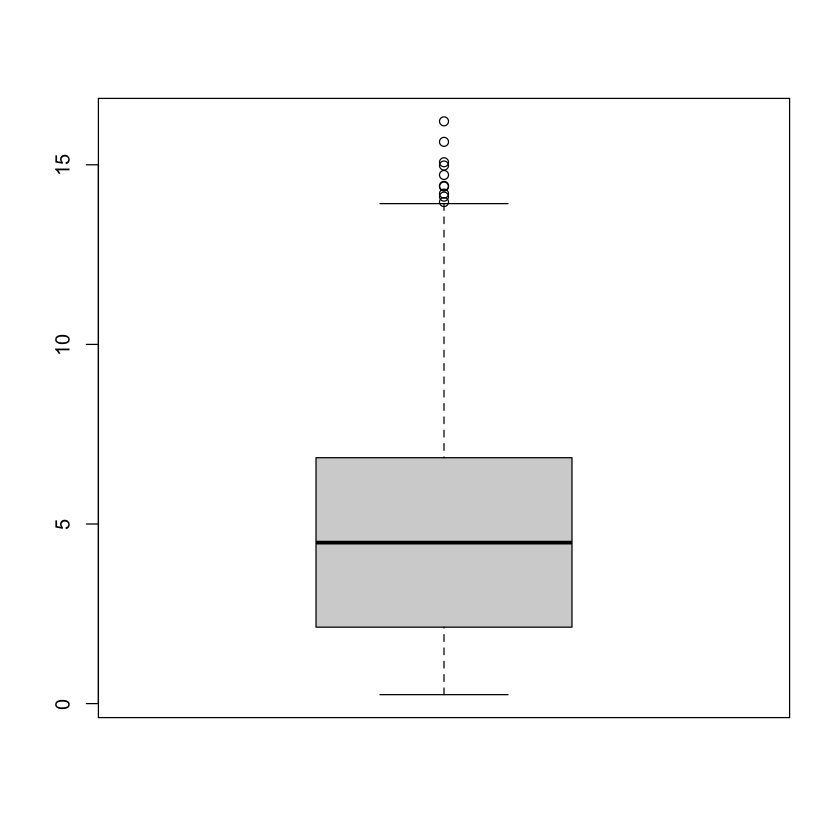

In [34]:
boxplot(tasa_corto_plazo$r1) # gráfica de boxplot de la distribución de los datos

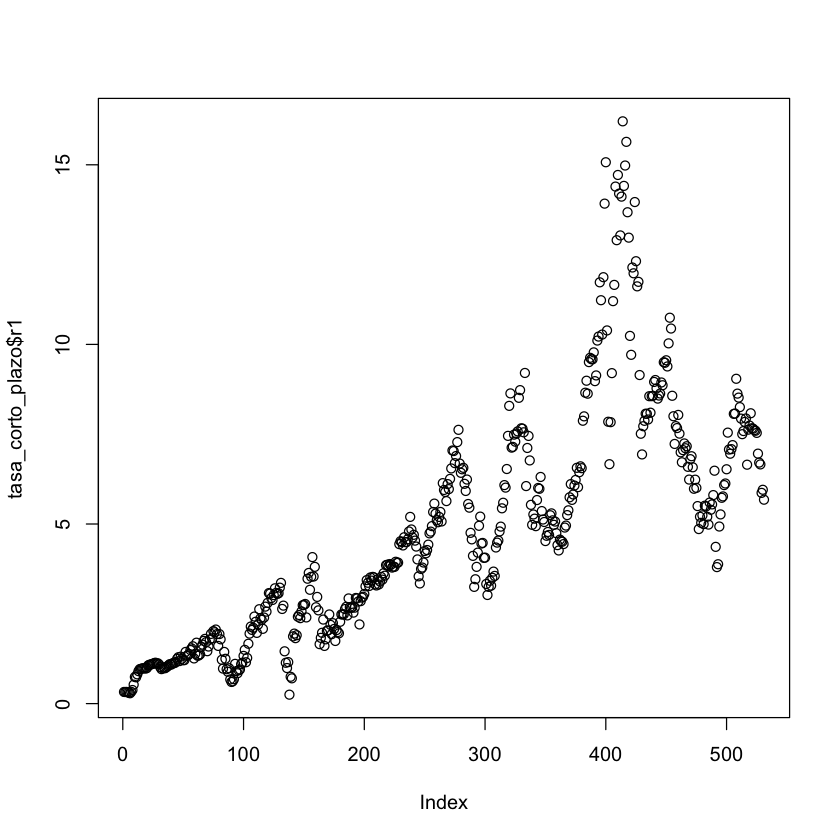

In [35]:
plot(tasa_corto_plazo$r1) # gráfica de los valores en la secuencia encontrada

Nótese que en las estimaciones estádisticas y gráficos mostrados arriba (mean, median, summary, boxplot y plot) se han usado para la SECUENCIA COMPLETA de valores en la columna "r1" de la tabla "tasa_corto_plazo".

No hemos hecho ninguna distinción de la fecha a la que corresponden esos valores analizados. 

No obstante, debemos tomar en cuenta el "detalle" que nuestro campo (columna) de fecha llamado "Date" se encuentra almacenado como tipo de dato "character" y no como campo de fecha propiamente dicho.

Resulta conveniente pasarlo de "character" a "Date" para poder maniobrar más fácilmente los componentes de la fecha.

In [36]:
tasa_corto_plazo$Date[1]

[1] "Dec 1946"

In [37]:
colnames(tasa_corto_plazo)[1] = "Date_char" # Cambiamos nombre de la primera columna

In [38]:
head(tasa_corto_plazo)

,Date_char,r1
,<chr>,<dbl>
1,Dec 1946,0.325
2,Jan 1947,0.322
3,Feb 1947,0.326
4,Mar 1947,0.318
5,Apr 1947,0.302
6,May 1947,0.288


Ahora vamos a crear una nueva columna con el nombre "Date" que corresponda con el tipo de dato de fecha.

Para eso, primero completemos nuestro campo "Date_char" con alguna indicación del día, ya que la función que usaremos para convertirlo del tipo "char" al tipo "Date" requiere una identificación de la fecha que no sea ambigua. Si dejamos el campo sólo como mes y año, la función de conversión no va a saber qué día del mes colocar.

Por convención propia, vamos a identificar el mes con el primer día del mes.

In [39]:
# usamos la función "paste" para concatenar dos cadenas de caractéres
# colocando como separador "sep" un caractér vacío.
tasa_corto_plazo$Date_char <- paste("01", tasa_corto_plazo$Date_char, sep = " ")

head(tasa_corto_plazo)

,Date_char,r1
,<chr>,<dbl>
1,01 Dec 1946,0.325
2,01 Jan 1947,0.322
3,01 Feb 1947,0.326
4,01 Mar 1947,0.318
5,01 Apr 1947,0.302
6,01 May 1947,0.288


<img src = "lista_simbolos_fecha.png">

In [40]:
tasa_corto_plazo$Fecha <- as.Date(tasa_corto_plazo$Date_char, '%d %b %Y')

In [41]:
head(tasa_corto_plazo)

,Date_char,r1,Fecha
,<chr>,<dbl>,<date>
1,01 Dec 1946,0.325,1946-12-01
2,01 Jan 1947,0.322,1947-01-01
3,01 Feb 1947,0.326,1947-02-01
4,01 Mar 1947,0.318,1947-03-01
5,01 Apr 1947,0.302,1947-04-01
6,01 May 1947,0.288,1947-05-01


Ahora nos interesa tener un campo que indique el número del mes y otro el número del año, de modo que podamos procesar la data usando esos valores (mes y año).

In [42]:
tasa_corto_plazo$mes <- as.numeric(format(tasa_corto_plazo$Fecha,"%m"))

In [43]:
head(tasa_corto_plazo)

,Date_char,r1,Fecha,mes
,<chr>,<dbl>,<date>,<dbl>
1,01 Dec 1946,0.325,1946-12-01,12
2,01 Jan 1947,0.322,1947-01-01,1
3,01 Feb 1947,0.326,1947-02-01,2
4,01 Mar 1947,0.318,1947-03-01,3
5,01 Apr 1947,0.302,1947-04-01,4
6,01 May 1947,0.288,1947-05-01,5


In [44]:
tasa_corto_plazo$anho <- as.numeric(format(tasa_corto_plazo$Fecha,"%Y"))

head(tasa_corto_plazo)

,Date_char,r1,Fecha,mes,anho
,<chr>,<dbl>,<date>,<dbl>,<dbl>
1,01 Dec 1946,0.325,1946-12-01,12,1946
2,01 Jan 1947,0.322,1947-01-01,1,1947
3,01 Feb 1947,0.326,1947-02-01,2,1947
4,01 Mar 1947,0.318,1947-03-01,3,1947
5,01 Apr 1947,0.302,1947-04-01,4,1947
6,01 May 1947,0.288,1947-05-01,5,1947


Ahora podemos utilizar la columna "Fecha" cuyo tipo de dato es "Date". Varias funciones de procesamiento de datos de "R" se acomodan fácilmente a este tipo de dato "Date". Por ejemplo, la función "plot" para graficar los valores y colocar la fechas adecuadamente en el gráfico. 

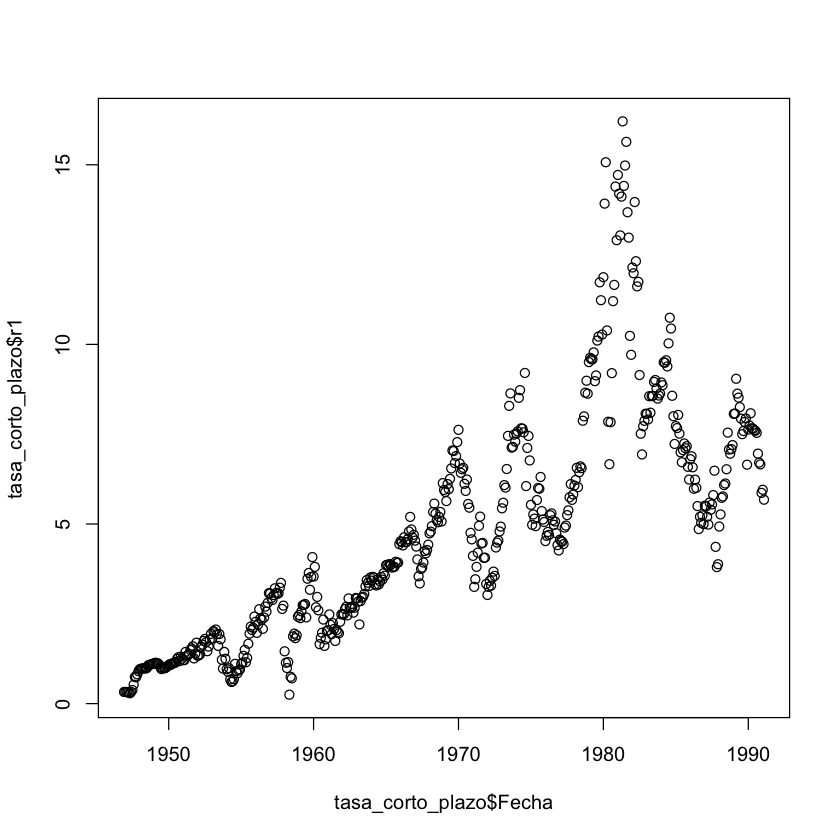

In [45]:
plot(x=tasa_corto_plazo$Fecha, y=tasa_corto_plazo$r1)

In [46]:
tasa_cp_75_90 <- tasa_corto_plazo[tasa_corto_plazo$anho >= 1975, ]

In [47]:
head(tasa_cp_75_90)

,Date_char,r1,Fecha,mes,anho
,<chr>,<dbl>,<date>,<dbl>,<dbl>
338,01 Jan 1975,5.533,1975-01-01,1,1975
339,01 Feb 1975,4.977,1975-02-01,2,1975
340,01 Mar 1975,5.266,1975-03-01,3,1975
341,01 Apr 1975,5.149,1975-04-01,4,1975
342,01 May 1975,4.940,1975-05-01,5,1975
343,01 Jun 1975,5.667,1975-06-01,6,1975


In [48]:
tasa_cp_75_90_filter <- filter(tasa_corto_plazo, anho >= 1975)
head(tasa_cp_75_90_filter)

,Date_char,r1,Fecha,mes,anho
,<chr>,<dbl>,<date>,<dbl>,<dbl>
1,01 Jan 1975,5.533,1975-01-01,1,1975
2,01 Feb 1975,4.977,1975-02-01,2,1975
3,01 Mar 1975,5.266,1975-03-01,3,1975
4,01 Apr 1975,5.149,1975-04-01,4,1975
5,01 May 1975,4.940,1975-05-01,5,1975
6,01 Jun 1975,5.667,1975-06-01,6,1975


In [49]:
tasa_cp_75_90_pipe <- tasa_corto_plazo %>% filter(anho >= 1975) # Hace lo mismo usando notación de "Piping"
head(tasa_cp_75_90_pipe)

,Date_char,r1,Fecha,mes,anho
,<chr>,<dbl>,<date>,<dbl>,<dbl>
1,01 Jan 1975,5.533,1975-01-01,1,1975
2,01 Feb 1975,4.977,1975-02-01,2,1975
3,01 Mar 1975,5.266,1975-03-01,3,1975
4,01 Apr 1975,5.149,1975-04-01,4,1975
5,01 May 1975,4.940,1975-05-01,5,1975
6,01 Jun 1975,5.667,1975-06-01,6,1975


In [50]:
check <- (tasa_cp_75_90$r1 == tasa_cp_75_90_pipe$r1)
check

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [16] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [31] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [46] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [61] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [76] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
 [91] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[106] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[121] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[136] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[151] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[166] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[181] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE

In [51]:
length(check)

[1] 194

¿Qué es eso de notación "piping"?
==

<img src="image_piping.png">

Usar notación "pinping" es una forma de escribir las instrucciones de modo que el código resultante sea visualmente más claro y fluido.

Ya vimos un primer ejemplo de notación piping, en la penultima instrucción arriba, que usamos para filtrar los valores de la tasa de corto plazo para años mayores a 1975.

Para reforzar mejor el uso de esta notación, veamos un ejemplo con el data frame llamado "iris" que viene junto con "R". Se trata de un data frame que describe varias medidas para tres espécies de plantas (Iris setosa, Iris versicolor, e Iris virginica). Estas medidas describen las diferencias morfologícas entre las tres espécies en términos del largo y ancho del sépalo ("Sepal.Length", "Sepal.With") así como el largo y ancho del pétalo ("Petal.Length", "Petal.Width").   

In [52]:
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


Digamos que nos gustaría comparar las especies de plantas en base a las característica que dispongo en esa tabla de datos. Sin embargo, supongamos también que quiero concentrar mi evaluación en aquellas especies que tienen un tamaño mínimo, digamos, aquellas especies con largo de sépalo mayor a 5 (Sepal.Length > 5) y largo de pétalo mayor a 3 (Petal.Length > 3).

Parece una buena idea concentrar el largo y el ancho en un sólo indicador que sea el áre (largo*ancho) tanto del sépalo como del pétalo, y comparar el valor medio de esas áreas para cada especie.

Veamos cómo procesariamos la tabla sin usar notación piping.

In [53]:
filtered_iris <- filter(iris, Sepal.Length > 5 & Petal.Length > 3)
mutated_iris <- mutate(filtered_iris, 
                       Sepal.Area = Sepal.Length * Sepal.Width,
                       Petal.Area = Petal.Length * Petal.Width)
grouped_iris <- group_by(mutated_iris, Species)
summary_iris <- summarize(grouped_iris, 
                          avg.sepal.area = mean(Sepal.Area),
                          avg.petal.area = mean(Petal.Area))

# View result
summary_iris

Species,avg.sepal.area,avg.petal.area
<fct>,<dbl>,<dbl>
versicolor,16.96304,5.926522
virginica,19.83633,11.370612


Ahora veamos cómo quedaría el mismo código pero usando la notación piping:

In [54]:
iris %>% 
  filter(Sepal.Length > 5 & Petal.Length > 3) %>%
  mutate(Sepal.Area = Sepal.Length * Sepal.Width,
         Petal.Area = Petal.Length * Petal.Width) %>%
  group_by(Species) %>%
  summarize(avg.sepal.area = mean(Sepal.Area),
            avg.petal.area = mean(Petal.Area))

Species,avg.sepal.area,avg.petal.area
<fct>,<dbl>,<dbl>
versicolor,16.96304,5.926522
virginica,19.83633,11.370612


Volvamos ahora al ejemplo de nuestra tasa de interés de corto plazo y usaremos la misma notación piping para encontrar el valor medio anual de las tasas de interés de corto plazo. Esto implica procesar por cada grupo anual.

<img src=image_aggregate.png>

In [55]:
media_anual <- tasa_corto_plazo %>%
    group_by(anho) %>%
    summarize(tasa_media = mean(r1))

media_anual

anho,tasa_media
<dbl>,<dbl>
1946,0.3250000
1947,0.4985000
1948,1.0235833
1949,1.0494167
1950,1.1724167
1951,1.4066667
1952,1.6083333
1953,1.6696667
1954,0.8448333


In [56]:
media_anual <- tasa_corto_plazo %>%
    group_by(anho) %>%
    summarize(tasa_media = mean(r1), tasa_maxima = max(r1), tasa_minima = min(r1))

media_anual

anho,tasa_media,tasa_maxima,tasa_minima
<dbl>,<dbl>,<dbl>,<dbl>
1946,0.3250000,0.325,0.325
1947,0.4985000,0.904,0.288
1948,1.0235833,1.110,0.959
1949,1.0494167,1.139,0.960
1950,1.1724167,1.307,1.072
1951,1.4066667,1.696,1.209
1952,1.6083333,1.941,1.332
1953,1.6696667,2.062,0.975
1954,0.8448333,1.107,0.603


In [57]:
media_anual <- tasa_corto_plazo %>%
    group_by(anho) %>%
    summarize(
        tasa_media = mean(r1),
        tasa_maxima = max(r1),
        tasa_minima = min(r1)
    )

media_anual

anho,tasa_media,tasa_maxima,tasa_minima
<dbl>,<dbl>,<dbl>,<dbl>
1946,0.3250000,0.325,0.325
1947,0.4985000,0.904,0.288
1948,1.0235833,1.110,0.959
1949,1.0494167,1.139,0.960
1950,1.1724167,1.307,1.072
1951,1.4066667,1.696,1.209
1952,1.6083333,1.941,1.332
1953,1.6696667,2.062,0.975
1954,0.8448333,1.107,0.603


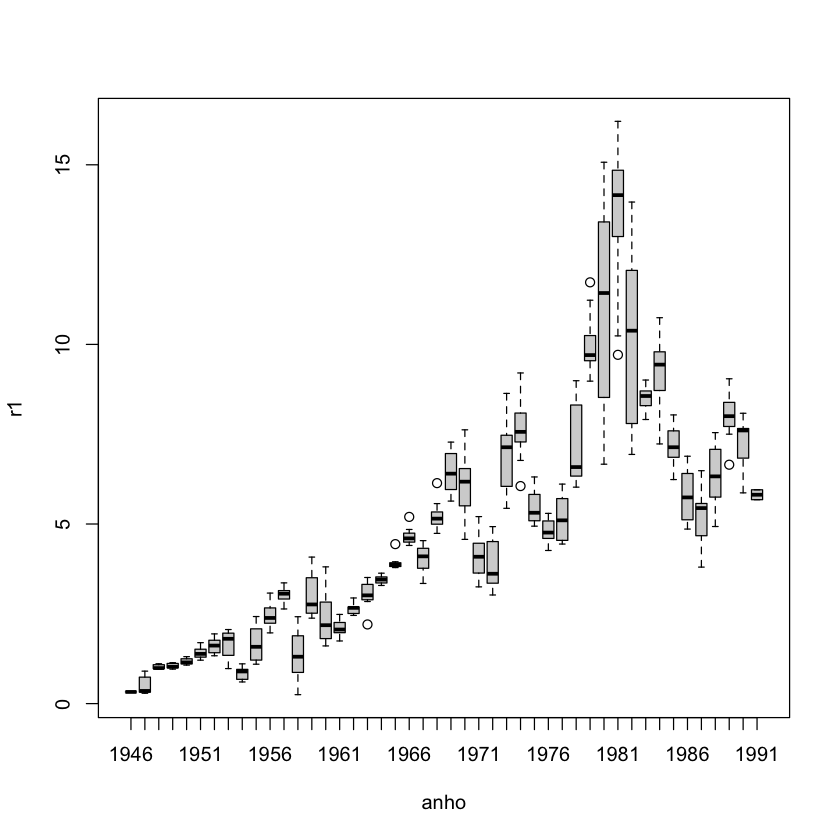

In [58]:
boxplot(r1 ~ anho, data = tasa_corto_plazo)

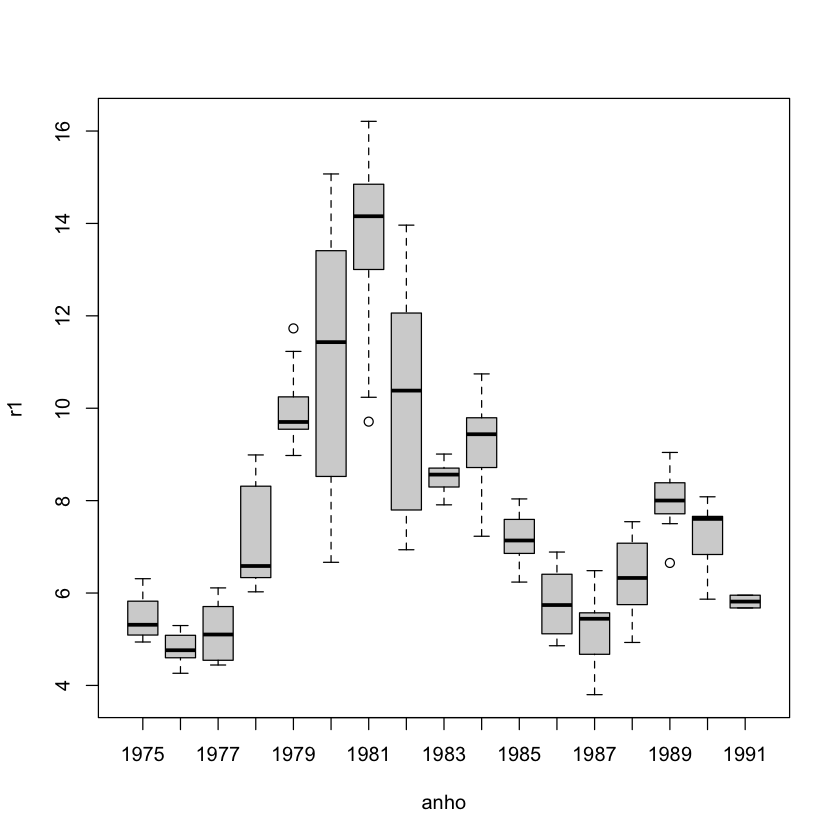

In [59]:
boxplot(r1 ~ anho, data = tasa_cp_75_90)

Leyendo datos de un repositorio particular en la nube
==

Más sobre "group_by" and "summarise"
==

En los ejemplos a continuación vamos a trabajar con una base de datos que se encuentra disponible en un repositorio de la nube. Esta base de datos se encuentra en formato CSV y contiene la cantidad de nacimientos ("nb_births") que se registraron con determinado nombre en cada año.

In [60]:
file_name_names <- "https://raw.githubusercontent.com/ramnathv/corise-r-for-ds/main/data/names.csv.gz"
tbl_names <- readr::read_csv(file_name_names, show_col_types = FALSE)
head(tbl_names)

year,name,sex,nb_births
<dbl>,<chr>,<chr>,<dbl>
1880,Mary,F,7065
1880,Anna,F,2604
1880,Emma,F,2003
1880,Elizabeth,F,1939
1880,Minnie,F,1746
1880,Margaret,F,1578


La función "group_by" nos permite agrupar una tabla por una o más columnas. Aplicando la función "group_by" a una tabla no ejecuta ningún cambio en su apariencia u organización, pero sí añade alguna "metadata" sobre las variables que hemos indicado para agrupar.

In [61]:
# Agrupado por UNA columna
tbl_names %>%
  group_by(sex) %>%
  head()

year,name,sex,nb_births
<dbl>,<chr>,<chr>,<dbl>
1880,Mary,F,7065
1880,Anna,F,2604
1880,Emma,F,2003
1880,Elizabeth,F,1939
1880,Minnie,F,1746
1880,Margaret,F,1578


In [62]:
# Agrupado por múltiples columnas
tbl_names %>%
  group_by(sex, name) %>%
  head()

year,name,sex,nb_births
<dbl>,<chr>,<chr>,<dbl>
1880,Mary,F,7065
1880,Anna,F,2604
1880,Emma,F,2003
1880,Elizabeth,F,1939
1880,Minnie,F,1746
1880,Margaret,F,1578


La razón por la que agrupamos una tabla por columnas es para que nos permita manipular los datos por grupos. Aunque la función "group_by" puede ser usada en tandem con varias funciones de manipulación de datos, de hecho la más común es la función "summarise". Esta agrega los datos para cada grupo de tal modo que colapsa a todos las filas del grupo en una sola fila que representa a ese grupo.

Se puede usar cualquier función dentro de "summarise" siempre que esa función colapse los multiples valores contenidos en el grupo en un único valor. Por ejemplo, podemos agregar la tabla de nombres para cada campo "sex" en términos de la cantidad total de nacimientos y la cantidad de nombres distintos.

In [63]:
tbl_names %>%
  group_by(sex) %>%
  summarise(
      nb_births = sum(nb_births),
      nb_names = n_distinct(name)
  )

sex,nb_births,nb_names
<chr>,<dbl>,<int>
F,179027755,69527
M,182860478,43093


Ahora encontremos la misma tabla pero agrupada primero por "year" y luego por "sex"

In [64]:
tbl_names %>%
  group_by(year, sex) %>%
  summarise(
      nb_births = sum(nb_births),
      nb_names = n_distinct(name)
  )

`summarise()` has grouped output by 'year'. You can override using the
`.groups` argument.


year,sex,nb_births,nb_names
<dbl>,<chr>,<dbl>,<int>
1880,F,90994,942
1880,M,110490,1058
1881,F,91953,938
1881,M,100737,996
1882,F,107847,1028
1882,M,113686,1099
1883,F,112319,1054
1883,M,104625,1030
1884,F,129019,1172


Usando "mutate" para crear y modificar columnas agrupadas
==

Un data frame (tabla) agrupado es identico a un data frame normal con EXCEPCIÓN que cualquie operación que realicemos sobre la tabla es aplicada a cada grupo señalado. Por ejemplo, supongamos que queremos calcular el porcentaje de nacimientos que tiene cada nombre de cada sexo en cada año, respecto al total de nacimientos que acumuló ese nombre en todos los años.

Podemos agrupar por "sex" y por "name" y usar la función "mutate()" para crear una nueva columna para la cantidad total de nacimientos por cada grupo, y luego usar esa cantidad total para calcular el porcentaje.

Luego podemos usar la función "ungroup()" para desagrupar la data, a continuación usamos "filter()" para filtrar los nombres que tienen una cantidad mayor a 50,000 nacimientos y finalmente usamos la función "arrange()" para ordenar la data en orden descendente del porcentaje de nacimientos por año.

Como se puede ver en el resultado, el nombre "Luna" tiene a lo largo de todos los años un total de 57494 nacimientos registrados, de los cuales el año 2021 fueron registrados 8173, que representan el 14.21% del total.

In [65]:
tbl_names %>%
  group_by(sex, name) %>%
  mutate(
      nb_births_total = sum(nb_births),
      pct_births_in_year = nb_births / nb_births_total * 100
  ) %>%
  ungroup() %>%
  filter(nb_births_total > 50000) %>%
  arrange(desc(pct_births_in_year)) %>%
  head()

year,name,sex,nb_births,nb_births_total,pct_births_in_year
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
2021,Luna,F,8173,57494,14.21540
2020,Luna,F,7818,57494,13.59794
2019,Luna,F,7778,57494,13.52837
2018,Mila,F,8158,61710,13.21990
2018,Luna,F,6931,57494,12.05517
2019,Mila,F,7330,61710,11.87814
